# Question 4

In [1]:
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('TaxiDataCleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pickup_community_area   15002 non-null  object 
 1   fare                    15002 non-null  float64
 2   trip_start_month        15002 non-null  int64  
 3   trip_start_hour         15002 non-null  int64  
 4   trip_start_day          15002 non-null  int64  
 5   trip_start_timestamp    15002 non-null  object 
 6   pickup_latitude         15002 non-null  float64
 7   pickup_longitude        15002 non-null  float64
 8   dropoff_latitude        15002 non-null  float64
 9   dropoff_longitude       15002 non-null  float64
 10  trip_miles              15002 non-null  float64
 11  dropoff_census_tract    15002 non-null  object 
 12  payment_type            15002 non-null  object 
 13  company                 15002 non-null  object 
 14  trip_seconds            15002 non-null

## Q4.a

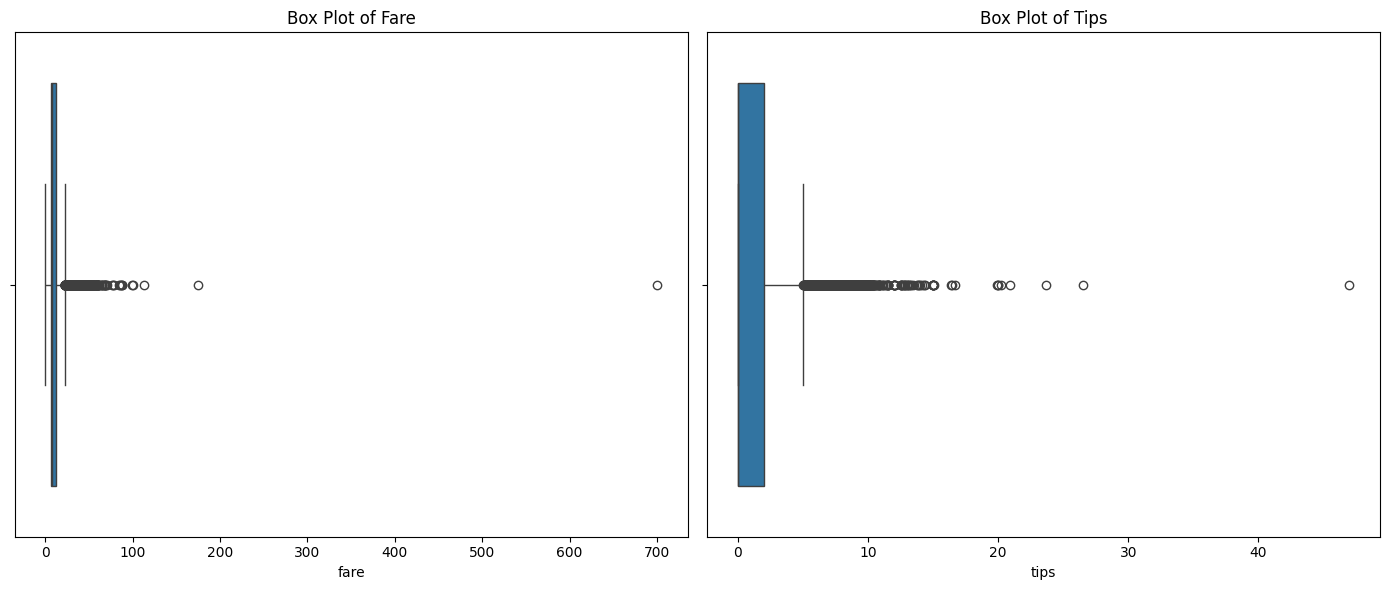

In [4]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['fare'])
plt.title("Box Plot of Fare")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['tips'])
plt.title("Box Plot of Tips")

plt.tight_layout()
plt.show()

### Interpretation: Impact of Outliers on Average Calculations

Outliers in the **fare** and **tips** data can significantly affect the average (mean) values in the dataset.

1. **Fare Outliers**:
   - The unusually high fare values, reaching up to around 700, are well beyond the range of typical fares.
   - These outliers increase the mean fare, making it higher than what a "typical" fare would be for most trips. This inflation of the mean can lead to a misrepresentation of what an average fare looks like in practice, potentially leading to flawed business insights or incorrect pricing models if the mean is assumed to represent typical fares.

2. **Tip Outliers**:
   - High tip values (over 10, for example) are uncommon, and their presence inflates the mean tip value.
   - Since most tips are relatively small, even a few high tips can skew the average upward, making it less representative of the actual tipping behavior. This could mislead stakeholders into overestimating how much drivers typically receive in tips.

### Suggested Methods for Handling Outliers in Predictive Models

To improve model performance and accuracy, it’s important to handle outliers effectively. Here are some common methods used in predictive modeling:

1. **Remove Outliers**:
   - *When to Use*: This approach is helpful the outliers are due to data entry errors or if they represent rare cases not relevant to general trends.
   - *How to Apply*: Outliers are typically defined as values more than 1.5 times the interquartile range (IQR) above the 75th percentile or below the 25th percentile. Removing them can reduce the skew but may lead to data loss if valid cases are discarded.

2. **Cap (or Clip) Outliers**:
   - *When to Use*: Capping is useful when outliers are valid data points but disproportionately affect the mean and variance.
   - *How to Apply*: Set an upper limit (for example, the 95th or 99th percentile) and replace values above this limit with the threshold. For example, if the 99th percentile fare is 50, any fare above this can be capped at 50.
   - *Benefits*: This approach retains all data while reducing the impact of extreme values.

3. **Transform Variables**:
   - *When to Use*: Transformation is suitable for continuous data with a long-tailed distribution, like fare values.
   - *How to Apply*: Apply mathematical transformations such as log, square root, or cube root. For example, using `log(fare + 1)` compresses the range, reducing the influence of high values.
   - *Benefits*: Transforming the variable reduces the effect of outliers on the mean and can improve model stability, though it changes the scale of the data, which may require careful interpretation.



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume df is the cleaned DataFrame
X = df[['trip_miles', 'trip_seconds', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
y = df['fare']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [6]:
from sklearn.metrics import mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 3.6015596058110395
RMSE: 5.938142137122983


In [11]:
y_test.mean()

8.380910129474486

y_test

In [8]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['fare'] >= Q1 - 1.5 * IQR) & (df['fare'] <= Q3 + 1.5 * IQR)]

In [9]:
X = df[['trip_miles', 'trip_seconds', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
y = df['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 2.287965985389565
RMSE: 3.581337895888862


#### Model Effectiveness

After processing the model through our validation checks, we get the following values,

- **Before Outlier Removal**
  - **MAE**: 3.60
  - **RMSE**: 5.94
  - **Mean of Actual Fares (y_test.mean())**: 8.38

- **After Outlier Removal**
  - **MAE**: 2.29
  - **RMSE**: 3.58

These metrics show that the model performed much better after removing outliers. Precisely, MAE and RMSE decreased, meaning that the model is closer to actual fare values after excluding outliers. This may suggest extreme fare values skewed the model initially and removing them resulted in achieving more accurate, consistent predictions.

#### Potential Limitations

1. **Restricted Feature Set**: The model heavily relies on trip miles, trip seconds, and location data (latitude/longitude). However, these cannot possibly include everything relevant that might affect the fare. A few examples of what is missing with this type of model are: **time-based factors** such as peak hours, day of week, and special events that literally contribute to the fare and, therefore, are omitted in this model.
2. **Linear Assumption**: Here, it assumes linearity between predictors and fare; this may be far from the fare dynamics in nature. Fares may depend in a much more complex and non-linear manner upon trip distance, time, or location, for which this model would probably fail to capture.

3. Handling Outliers Removing outliers improved the model's performance; however, in real-world application, it is not a very good approach to exclude high-fare or high-duration trips. High-fare trips can be valid edge cases (e.g. long-ride airport trips or luxury services) that we would want to predict correctly rather than exclude.

4. **Chances of over-fitting**: After removal of outliers, the model would be fit well for the usual trips but fail to predict in the infrequent or odd cases if those are introduced again in test environment

#### Improvable aspects

1. **Add more features**
   - Adding **trip start hour, day of week, payment type, company** would have many more insights and more precise prediction.
   - **Engineered Features**: Develop other feature derivations. For instance, straight-line distance between pickup and drop-off locations, or binary indicators for peak hours vs. off-peak.

2. **Feature Scaling**:
   - **Normalize or standardize** features like distance and duration to improve model convergence and stability. For linear regression, scaling can help if the features have vastly different ranges, as it prevents any one feature from disproportionately influencing the model.

3. **Use Cross-Validation**:
   - Instead of a single train-test split, use **cross-validation** (e.g., k-fold cross-validation) to assess the model's performance across multiple data splits. This helps to ensure that the model's performance metrics (MAE, RMSE) are consistent and not overly dependent on one specific train-test split.

